**Author**: Simon Richard

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

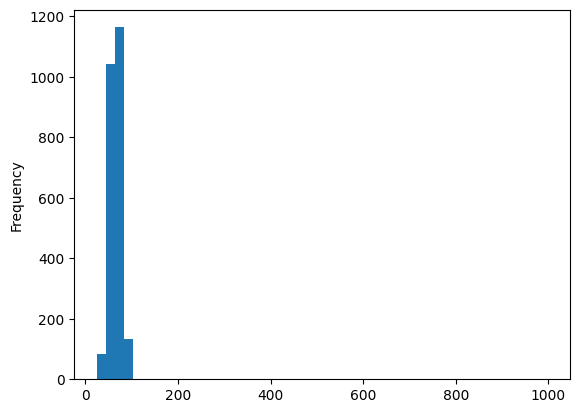

In [3]:
df['CGAS-CGAS_Score'].plot(kind='hist', bins=50)

In [4]:
df['CGAS-CGAS_Score'].min(), df['CGAS-CGAS_Score'].max()

(np.float64(25.0), np.float64(999.0))

According to https://www.corc.uk.net/outcome-experience-measures/childrens-global-assessment-scale-cgas/, CGAS should not go over 100.

In [5]:
(df['CGAS-CGAS_Score'] > 100).sum()

np.int64(1)

In [8]:
df.loc[df['CGAS-CGAS_Score'] > 100, 'CGAS-CGAS_Score'] = float('nan')

<Axes: xlabel='CGAS Score', ylabel='Frequency'>

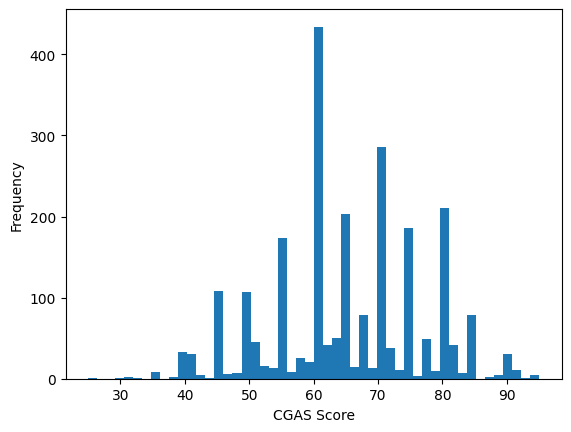

In [10]:
df['CGAS-CGAS_Score'].plot(kind='hist', bins=50, xlabel="CGAS Score", ylabel="Frequency")

This seems normal-ish, although with some psuedo-quantization that is probably caused by how the score is constructed OR by the tendencies of human scorers.

[Text(0.5, 0, 'Season of administration'), Text(0, 0.5, 'CGAS score')]

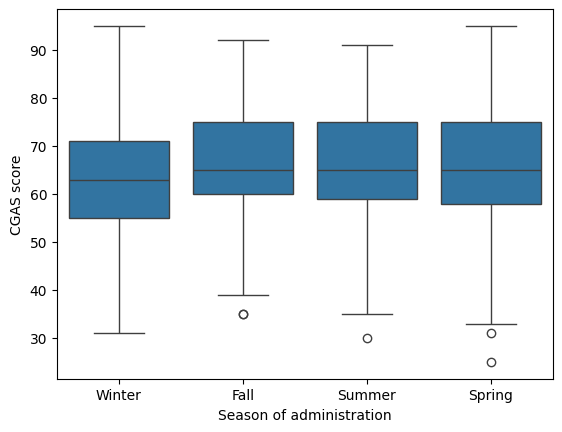

In [14]:
import seaborn as sns
ax = sns.boxplot(df, x='CGAS-Season', y='CGAS-CGAS_Score')
ax.set(xlabel='Season of administration', ylabel='CGAS score')

Let's to an ANOVA test to see if there is a significant difference between the groups.

In [17]:
from scipy.stats import f_oneway
f_oneway(*[
    df[
        (df['CGAS-Season'] == season) &
            df['CGAS-CGAS_Score'].notna()
    ]['CGAS-CGAS_Score']
        for season in ['Winter', 'Spring', 'Summer', 'Fall']
])

F_onewayResult(statistic=np.float64(3.4654277132587348), pvalue=np.float64(0.015625195038688536))

In [18]:
from scipy.stats import ttest_ind
for other_season in ['Spring', 'Summer', 'Fall']:
    statistic, pvalue = ttest_ind(*[
        df[
            (df['CGAS-Season'] == season) &
                df['CGAS-CGAS_Score'].notna()
        ]['CGAS-CGAS_Score']
            for season in ['Winter', other_season]
    ], alternative='less')
    print(pvalue)

0.014384698413015063
0.0264156797770932
0.0008023161192520291


CGAS scores are significantly worse in the winter compared to any other season.